In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [1]:
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn Power!
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import copy

In [4]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
sample_submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

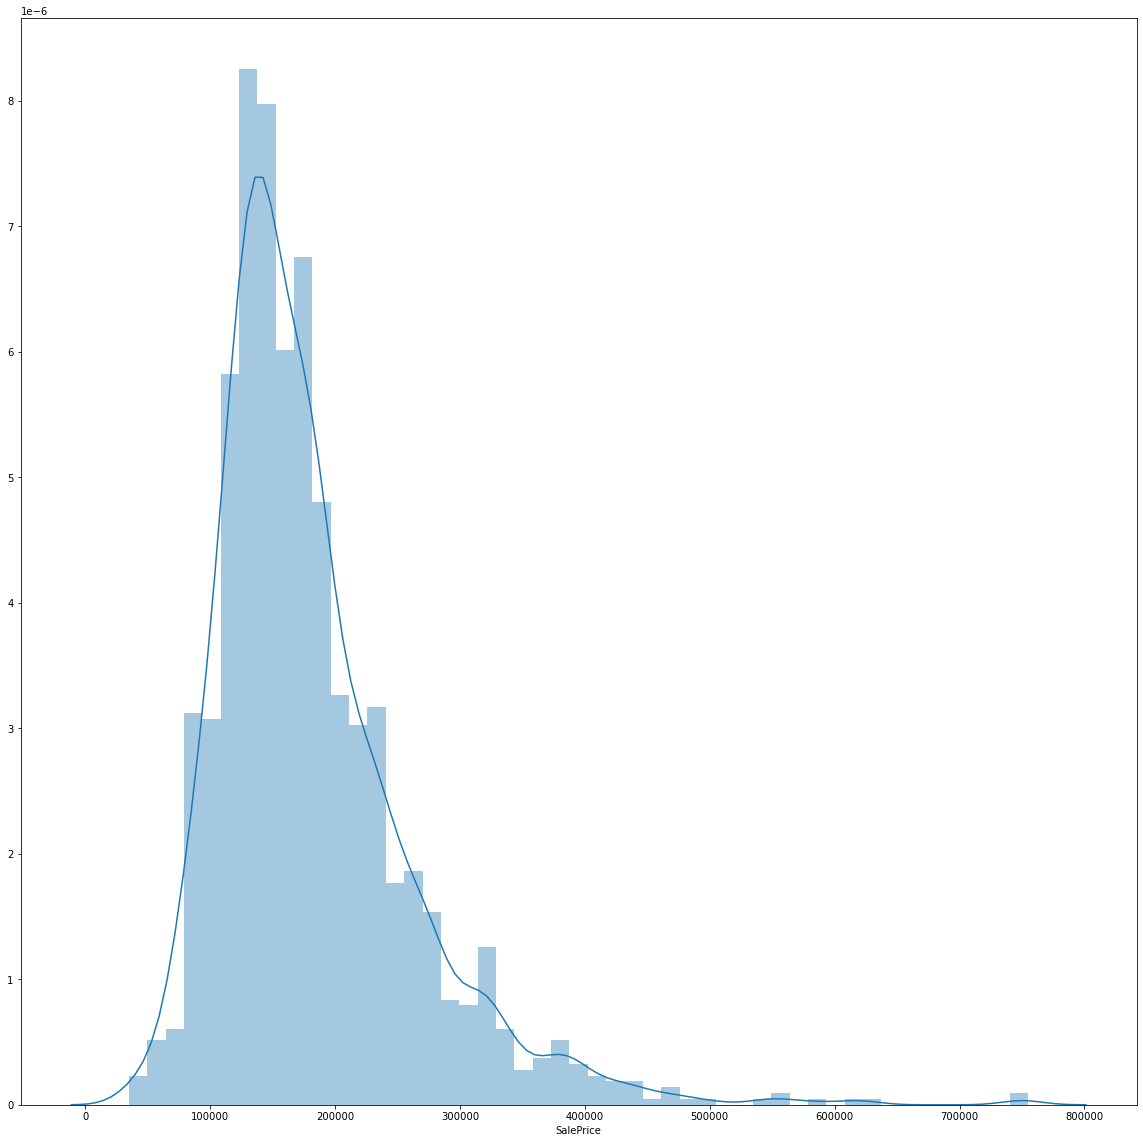

In [7]:
f, ax = plt.subplots(figsize = (20, 20))

sns.distplot(train['SalePrice'])

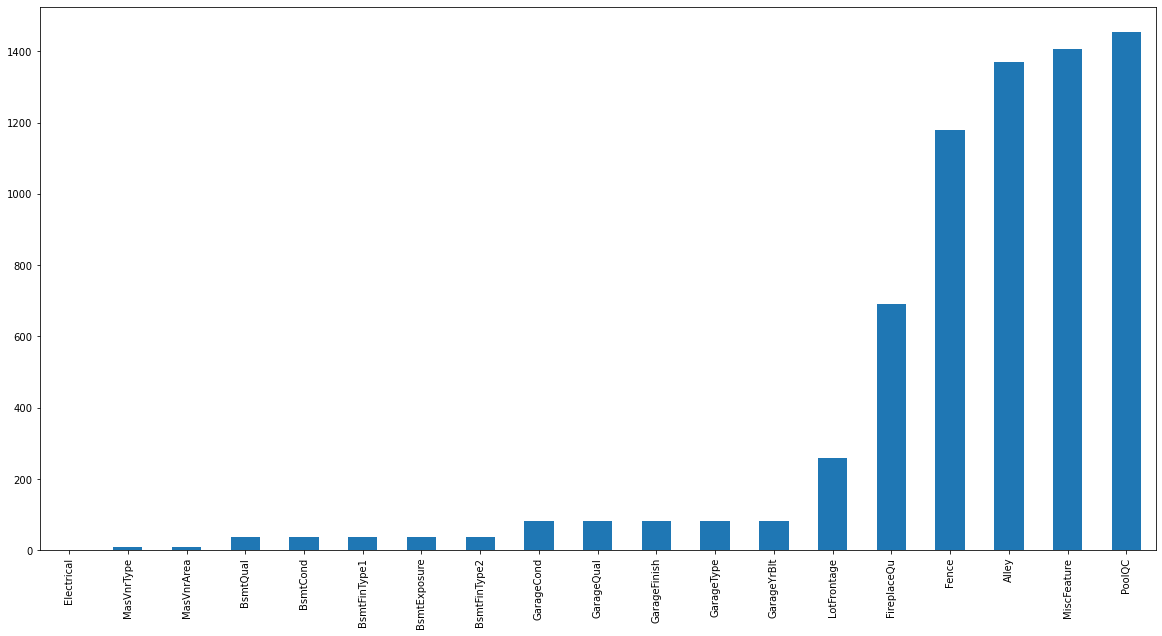

In [8]:
plt.figure(figsize=(20, 10))

missing_train = train.isnull().sum()

missing_train = missing_train[missing_train > 0]

missing_train.sort_values(inplace = True)

missing_train.plot.bar()

In [9]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

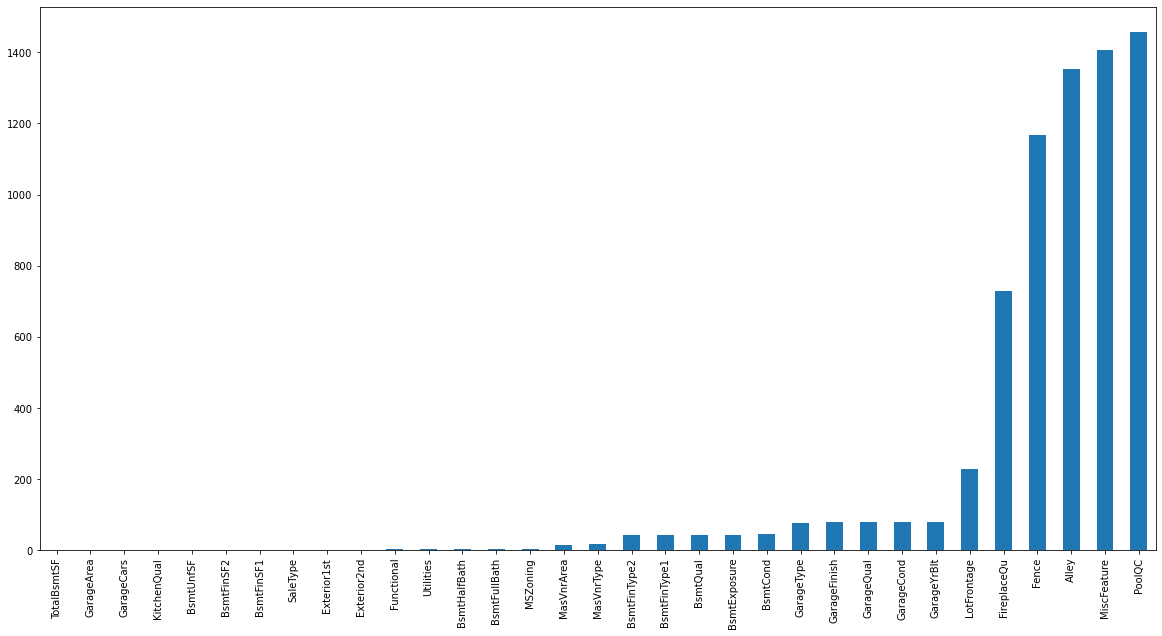

In [11]:
plt.figure(figsize=(20, 10))

missing_test = test.isnull().sum()

missing_test = missing_test[missing_test > 0]

missing_test.sort_values(inplace = True)

missing_test.plot.bar()

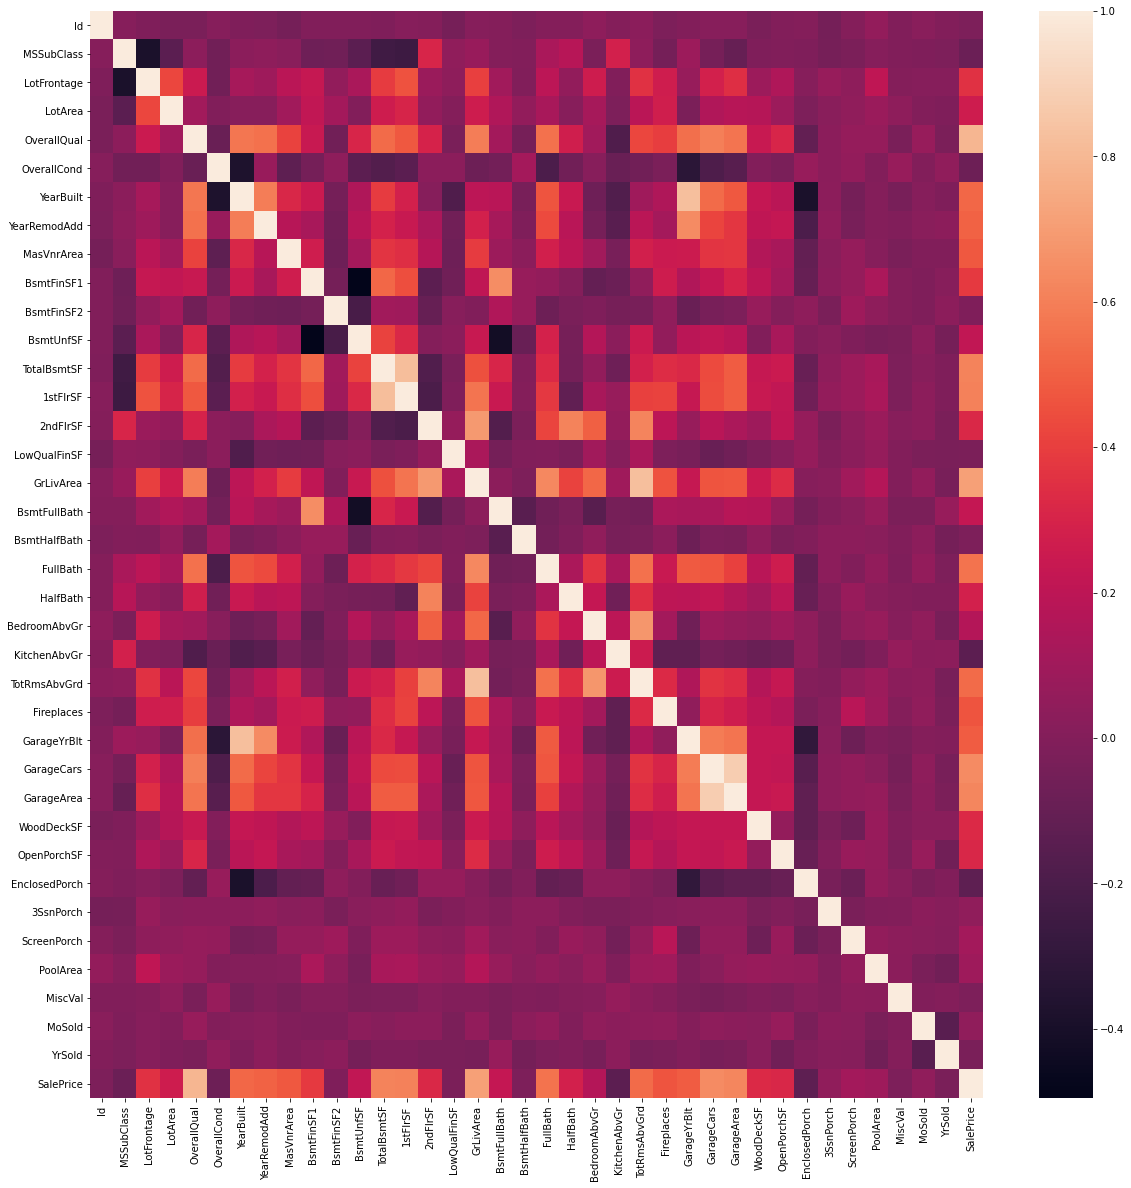

In [12]:
correlation_matrix = train.corr()

f, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(correlation_matrix)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')
[[1.         0.7909816  0.70862448 0.6404092  0.62343144]
 [0.7909816  1.         0.59300743 0.60067072 0.56202176]
 [0.70862448 0.59300743 1.         0.46724742 0.46899748]
 [0.6404092  0.60067072 0.46724742 1.         0.88247541]
 [0.62343144 0.56202176 0.46899748 0.88247541 1.        ]]


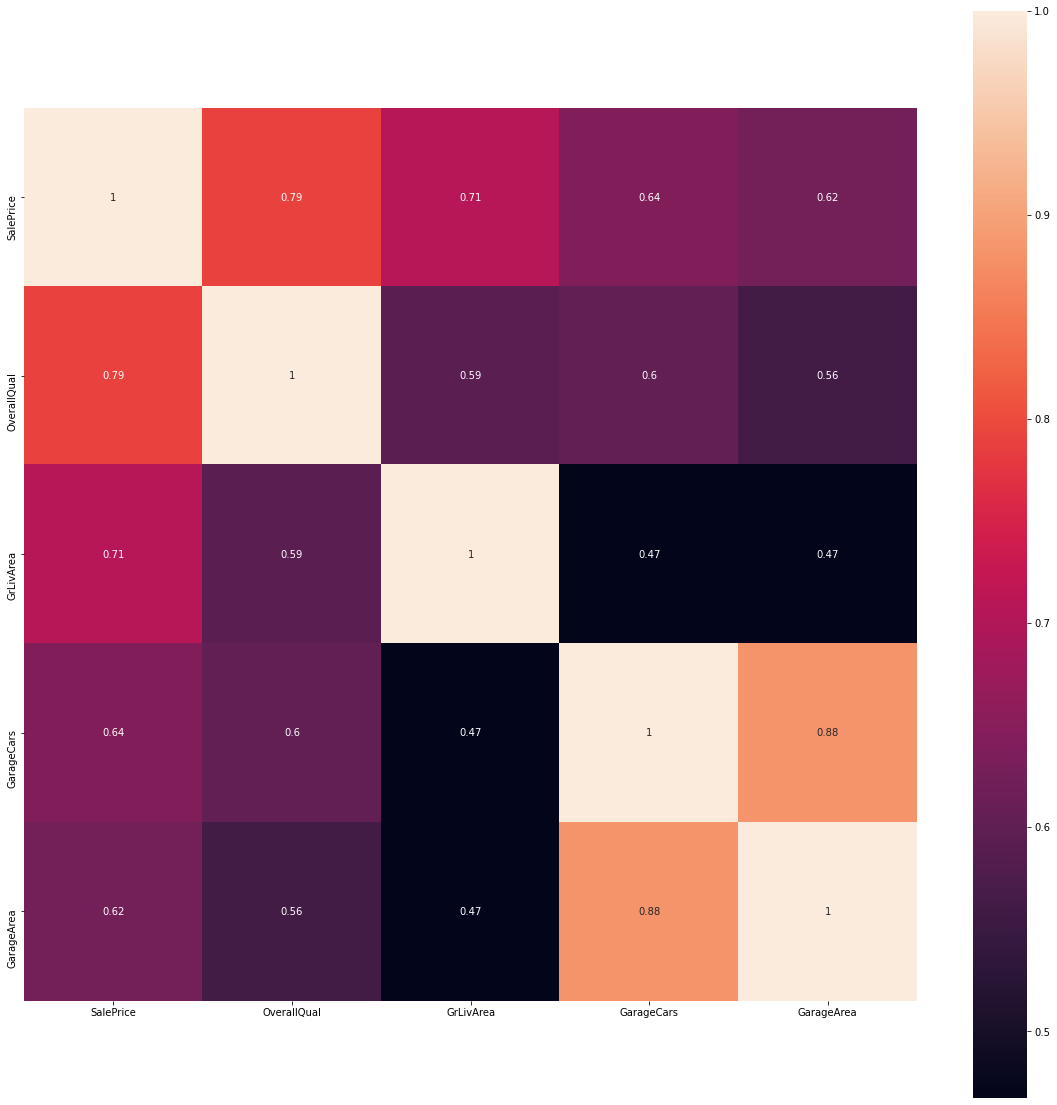

In [14]:
k=5

columns = correlation_matrix.nlargest(k, 'SalePrice')['SalePrice'].index

print(columns)

correlation_matrix = np.corrcoef(train[columns].values.T)

print(correlation_matrix)

f, ax = plt.subplots(figsize=(20, 20))

heatmap = sns.heatmap(correlation_matrix, cbar = True, annot = True, square = True, yticklabels = columns.values, xticklabels = columns.values)

plt.show()


In [15]:
testID = test['Id']

In [16]:
for c in train:
    if train[c].dtype == 'object':
        train[c] = train[c].fillna(train[c].mode())
    else:
        train[c] = train[c].fillna(train[c].median())

In [17]:
def label_encoding(df_train, df_test):
    le_count = 0
    
    for col in df_train:
        if df_train[col].dtype == 'object':
            if len(list(df_train[col].unique())) <= 2:
                le = LabelEncoder()
                le.fit(list(df_train[col].unique())+list(df_test[col].unique()))

                df_train[col] = le.transform(df_train[col].astype(str))
                df_test[col] = le.transform(df_test[col].astype(str))
                le_count +=1;
               
    
    print("Total label encoded columns : %d " %le_count)

In [18]:
label_encoding(train, test)

train.shape, test.shape

Total label encoded columns : 3 


((1460, 81), (1459, 80))

In [19]:
train_len = len(train)

data = pd.concat(objs = [train, test], axis = 0)

data = pd.get_dummies(data)

In [20]:
train = copy.copy(data[:train_len])

test = copy.copy(data[train_len:])

test = test.drop(['SalePrice'], axis = 1)

In [21]:
train.shape, test.shape

((1460, 287), (1459, 286))

In [22]:
corr = train.corr().sort_values('SalePrice')

cols = corr['SalePrice'][corr['SalePrice'].values > 0.05].index.values

len(cols)


85

In [23]:
train_label = train['SalePrice']

cols = np.delete(cols, len(cols) - 1)

train_sample = train[cols]

test_sample = test[cols]

In [24]:
test_sample.head()

,Neighborhood_ClearCr,Neighborhood_Veenker,Neighborhood_Crawfor,Neighborhood_CollgCr,Exterior2nd_ImStucc,BsmtCond_Gd,MSZoning_FV,PoolArea,Heating_GasA,BsmtCond_TA,...,YearBuilt,TotRmsAbvGrd,BsmtQual_Ex,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
0,0,0,0,0,0,0,0,0,1,1,...,1961,5,0,1,896,882.0,730.0,1.0,896,5
1,0,0,0,0,0,0,0,0,1,1,...,1958,6,0,1,1329,1329.0,312.0,1.0,1329,6
2,0,0,0,0,0,0,0,0,1,1,...,1997,6,0,2,928,928.0,482.0,2.0,1629,5
3,0,0,0,0,0,0,0,0,1,1,...,1998,7,0,2,926,926.0,470.0,2.0,1604,6
4,0,0,0,0,0,0,0,0,1,1,...,1992,5,0,2,1280,1280.0,506.0,2.0,1280,8


In [25]:
train_sample.head()

,Neighborhood_ClearCr,Neighborhood_Veenker,Neighborhood_Crawfor,Neighborhood_CollgCr,Exterior2nd_ImStucc,BsmtCond_Gd,MSZoning_FV,PoolArea,Heating_GasA,BsmtCond_TA,...,YearBuilt,TotRmsAbvGrd,BsmtQual_Ex,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
0,0,0,0,1,0,0,0,0,1,1,...,2003,8,0,2,856,856.0,548.0,2.0,1710,7
1,0,1,0,0,0,0,0,0,1,1,...,1976,6,0,2,1262,1262.0,460.0,2.0,1262,6
2,0,0,0,1,0,0,0,0,1,1,...,2001,6,0,2,920,920.0,608.0,2.0,1786,7
3,0,0,1,0,0,1,0,0,1,0,...,1915,7,0,1,961,756.0,642.0,3.0,1717,7
4,0,0,0,0,0,0,0,0,1,1,...,2000,9,0,2,1145,1145.0,836.0,3.0,2198,8


In [26]:
imputer = SimpleImputer(strategy = 'median')

imputer.fit(train_sample)

train_sample = imputer.transform(train_sample)
test_sample = imputer.transform(test_sample)

In [27]:
scaler = StandardScaler()

scaler.fit(train_sample)

train_sample = scaler.transform(train_sample)
test_sample = scaler.transform(test_sample)

In [28]:
X_train, X_test , y_train, y_test = train_test_split(train_sample, train_label, train_size = 0.8, random_state = 64)

In [29]:
X_train.shape, X_test.shape, test_sample.shape

((1168, 84), (292, 84), (1459, 84))

In [30]:
rf = RandomForestRegressor(n_estimators = 10000, random_state = 64)

In [31]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10000, random_state=64)

In [32]:
rf.score(X_train, y_train)

0.9785412248245704

In [33]:
y_pred = rf.predict(X_test)

[]

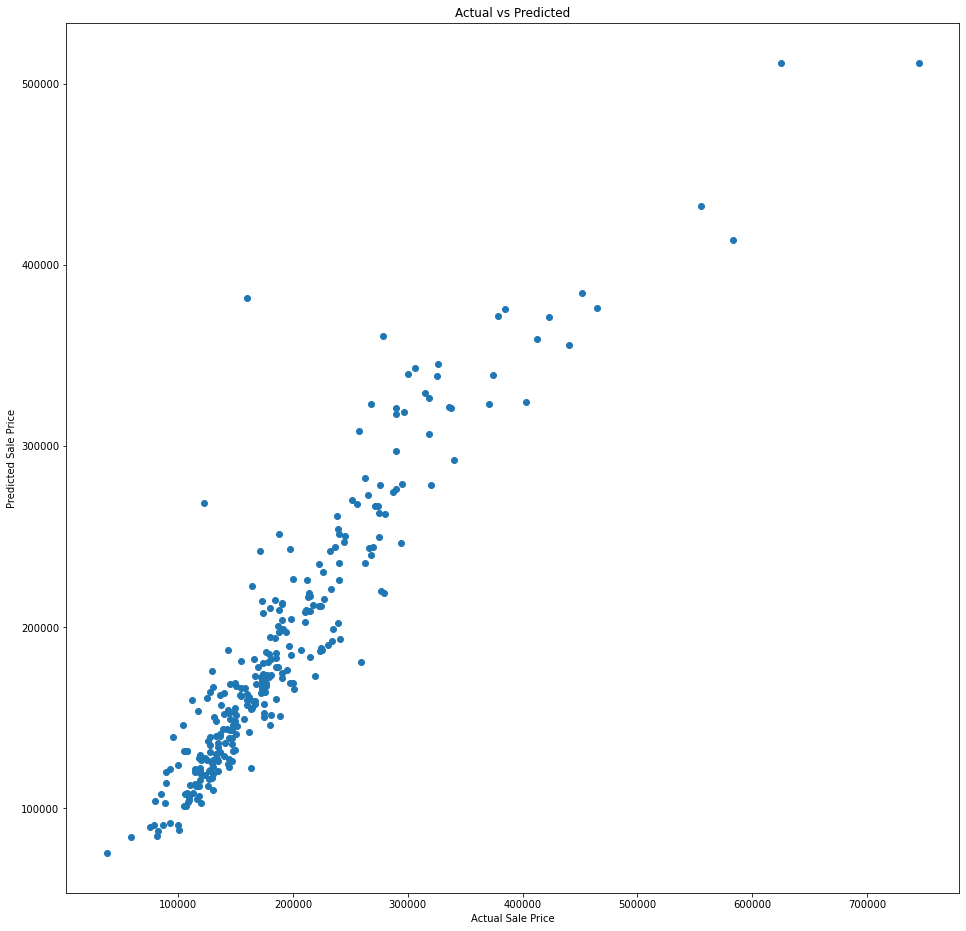

In [34]:
plt.figure(figsize = (16, 16))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot()

In [35]:
test_pred = rf.predict(test_sample)

submission = pd.DataFrame()

submission['ID'] = testID

submission['SalePrice'] = test_pred

In [36]:
submission.head()
submission.to_csv('house_prices_random_forest_submission.csv', index = False)